# Import libs

In [1]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from kmeans.kmeans import kmeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Vertebral Column 3C dataset

In [2]:
Xy = pd.read_csv('./datasets/vertebral_column_3C.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [4]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    kmeans_model = kmeans(k=20, type_distance_calc='euclidean', number_iteration=300)
    kmeans_model.fit(X_train, y_train)

    hit_rate_list.append(kmeans_model.score(X_test, y_test))

    y_pred = [kmeans_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [5]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.8225806451612904, 0.3548387096774194, 0.41935483870967744, 0.3709677419354839, 0.532258064516129, 0.22580645161290322, 0.5967741935483871, 0.1774193548387097, 0.1935483870967742, 0.41935483870967744]

Accuracy:
0.41129032258064513

Standard Deviation:
0.1896447744565298

Confusion Matrix:
[[12  3  0]
 [ 6 11  0]
 [ 0  2 28]]
[[ 6  5  5]
 [10  0 11]
 [ 0  9 16]]
[[ 2  7  6]
 [ 6  6  7]
 [ 5  5 18]]
[[ 3  3  6]
 [ 5  3  7]
 [ 1 17 17]]
[[ 7  4  1]
 [11  4  8]
 [ 1  4 22]]
[[ 1  0 10]
 [ 3  2 17]
 [ 6 12 11]]
[[ 8  5  3]
 [ 7  9  4]
 [ 5  1 20]]
[[ 2  2 13]
 [ 1  2 13]
 [ 7 15  7]]
[[ 0  9  6]
 [ 0  3 16]
 [ 7 12  9]]
[[ 4  4  4]
 [ 5  6  6]
 [ 7 10 16]]


# Choosing two columns from the last X_train and X_test to plot decision surface

In [7]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
         0      1
197  58.83  37.58
295  46.43   6.62
257  50.16  -2.97
49   41.77  17.90
126  70.68  21.70
..     ...    ...
144  60.04  14.31
265  48.17   9.59
71   86.90  32.93
161  67.26   7.19
214  45.70  10.66

[248 rows x 2 columns]
Test dataset:
         0      1
63   77.69  21.38
208  87.68  20.37
276  51.33  13.63
229  43.44  10.10
18   38.70  13.44
..     ...    ...
107  78.43  33.43
147  55.08  -3.76
92   85.35  15.84
59   48.11  14.93
36   32.09   6.99

[62 rows x 2 columns]


# Training the model with the new dataset 2d

In [8]:
kmeans_model = kmeans(k=3, type_distance_calc='euclidean', number_iteration=150)
kmeans_model.fit(X_train_2d, y_train)

# Plotting decision surface

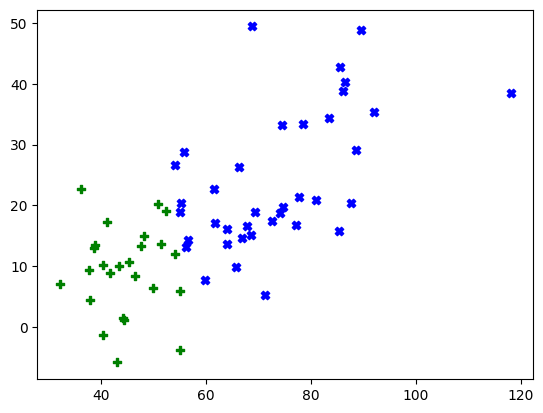

In [10]:
data = X_test_2d[:][:].values

y_pred = np.array([kmeans_model.predict(x) for x in X_test_2d.values])

dh = np.where(y_pred == 'DH')
sl = np.where(y_pred == 'SL')
no = np.where(y_pred == 'NO')

plt.scatter(data[dh, 0], data[dh, 1],
            color='red', marker='o', label='dh')
plt.scatter(data[sl, 0], data[sl, 1],
            color='blue', marker='X', label='sl')
plt.scatter(data[no, 0], data[no, 1],
            color='green', marker='P', label='no')

plt.show()